<a href="https://colab.research.google.com/github/tio14/Home-Kredit-Internship/blob/main/Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl
from matplotlib.gridspec import GridSpec

plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
data_path = 'gdrive/MyDrive/Rakamin Academy/Final Project/application_train.csv'
df = pd.read_csv(data_path)

In [4]:
columns = ['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 
           'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 
           'REGION_POPULATION_RELATIVE', 'OCCUPATION_TYPE']
skipped_columns = ['SK_ID_CURR', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
           'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
           'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 
           'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE']
data = df[columns]
data.shape

(307511, 17)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 17 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   TARGET                      307511 non-null  int64  
 1   NAME_CONTRACT_TYPE          307511 non-null  object 
 2   CODE_GENDER                 307511 non-null  object 
 3   FLAG_OWN_CAR                307511 non-null  object 
 4   FLAG_OWN_REALTY             307511 non-null  object 
 5   CNT_CHILDREN                307511 non-null  int64  
 6   AMT_INCOME_TOTAL            307511 non-null  float64
 7   AMT_CREDIT                  307511 non-null  float64
 8   AMT_ANNUITY                 307499 non-null  float64
 9   AMT_GOODS_PRICE             307233 non-null  float64
 10  NAME_TYPE_SUITE             306219 non-null  object 
 11  NAME_INCOME_TYPE            307511 non-null  object 
 12  NAME_EDUCATION_TYPE         307511 non-null  object 
 13  NAME_FAMILY_ST

In [6]:
data.duplicated().sum()

363

In [7]:
data = data.drop_duplicates()
data.duplicated().sum()

0

In [8]:
data['TARGET'].value_counts(normalize=True)

0    0.919192
1    0.080808
Name: TARGET, dtype: float64

Bar and Pie Chart for Payment Difficulties

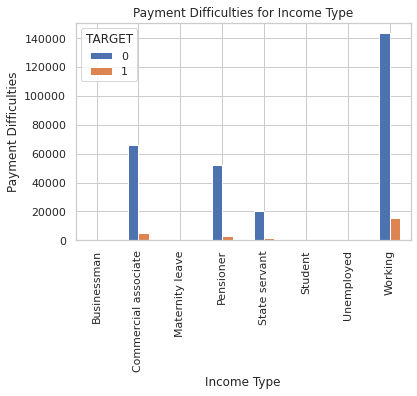

In [9]:
pd.crosstab(data.NAME_INCOME_TYPE, data.TARGET).plot(kind='bar')
plt.title('Payment Difficulties for Income Type')
plt.xlabel('Income Type')
plt.ylabel('Payment Difficulties')
plt.savefig('Income Type')

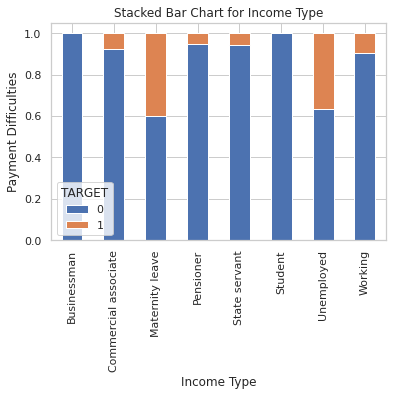

In [10]:
table = pd.crosstab(data.NAME_INCOME_TYPE, data.TARGET)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart for Income Type')
plt.xlabel('Income Type')
plt.ylabel('Payment Difficulties')
plt.savefig('Income Type with Stacked Bar')

In [11]:
pie = data['NAME_INCOME_TYPE'].value_counts(sort=False)
pie_label =data['NAME_INCOME_TYPE'].unique()

In [12]:
print(pie)
print(pie_label)

Working                 158649
State servant            21699
Commercial associate     71576
Pensioner                55169
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64
['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']


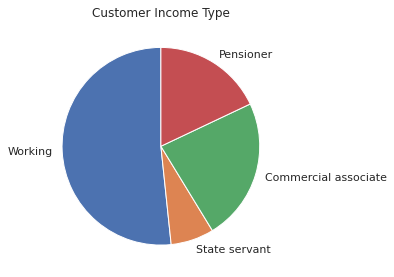

In [13]:
plt.figure(1, figsize=(20,10))
the_grid = GridSpec(2, 2)
plt.subplot(the_grid[0,1], aspect=1, title='Customer Income Type')
plt.pie(pie[:4], labels=pie_label[:4], startangle=90)
plt.show()

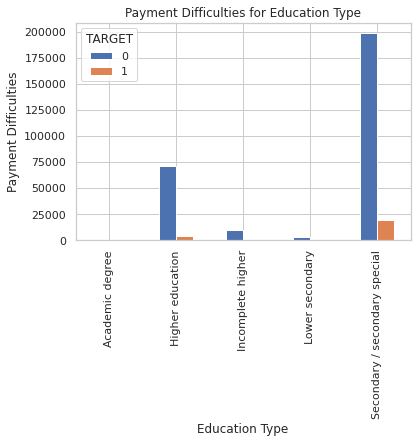

In [14]:
pd.crosstab(data.NAME_EDUCATION_TYPE, data.TARGET).plot(kind='bar')
plt.title('Payment Difficulties for Education Type')
plt.xlabel('Education Type')
plt.ylabel('Payment Difficulties')
plt.savefig('Education Type')

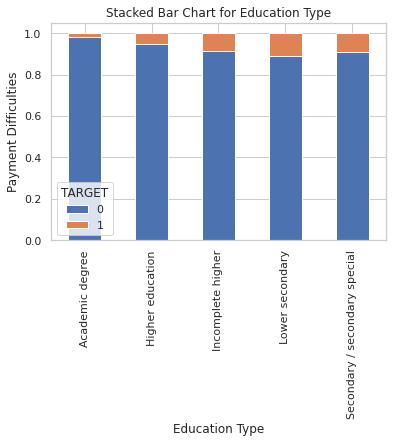

In [15]:
table = pd.crosstab(data.NAME_EDUCATION_TYPE, data.TARGET)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart for Education Type')
plt.xlabel('Education Type')
plt.ylabel('Payment Difficulties')
plt.savefig('Education Type with Stacked Bar')

In [16]:
pie = data['NAME_EDUCATION_TYPE'].value_counts(sort=False)
pie_label =data['NAME_EDUCATION_TYPE'].unique()
print(pie)
print(pie_label)

Secondary / secondary special    218070
Higher education                  74824
Incomplete higher                 10274
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64
['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']


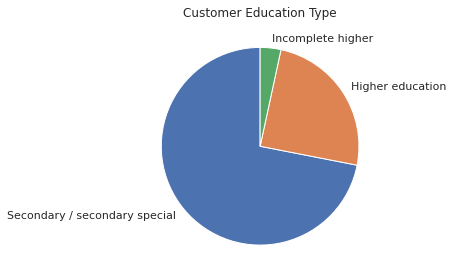

In [17]:
plt.figure(1, figsize=(20,10))
the_grid = GridSpec(2, 2)
plt.subplot(the_grid[0,1], aspect=1, title='Customer Education Type')
plt.pie(pie[:3], labels=pie_label[:3], startangle=90)
plt.show()

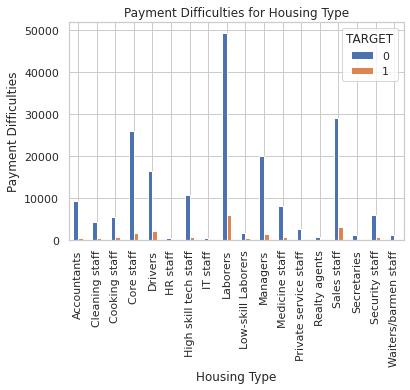

In [18]:
pd.crosstab(df.OCCUPATION_TYPE, df.TARGET).plot(kind='bar')
plt.title('Payment Difficulties for Housing Type')
plt.xlabel('Housing Type')
plt.ylabel('Payment Difficulties')
plt.savefig('Housing Type')

In [32]:
pd.crosstab(data.OCCUPATION_TYPE, data.TARGET)

TARGET,0,1
OCCUPATION_TYPE,,
Accountants,9336,474
Cleaning staff,4206,447
Cooking staff,5325,621
Core staff,25814,1738
Drivers,16485,2105
HR staff,527,36
High skill tech staff,10679,701
IT staff,492,34
Laborers,49287,5836


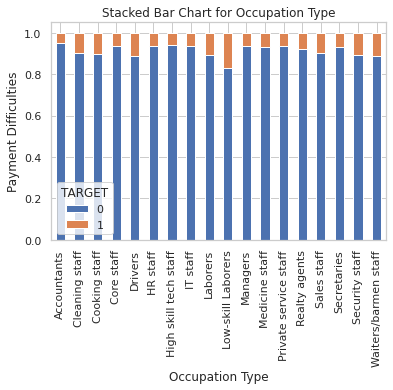

In [69]:
table = pd.crosstab(df.OCCUPATION_TYPE, df.TARGET)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart for Occupation Type')
plt.xlabel('Occupation Type')
plt.ylabel('Payment Difficulties')
plt.savefig('Occupation Type with Stacked Bar')

In [20]:
pie = data['OCCUPATION_TYPE'].value_counts(sort=False)
pie_label =data['OCCUPATION_TYPE'].dropna().unique()
print(len(pie))
print(len(pie_label))

18
18


In [21]:
pie

Laborers                 55123
Core staff               27552
Accountants               9810
Managers                 21360
Drivers                  18590
Sales staff              32070
Cleaning staff            4653
Cooking staff             5946
Private service staff     2652
Medicine staff            8534
Security staff            6721
High skill tech staff    11380
Waiters/barmen staff      1346
Low-skill Laborers        2093
Realty agents              751
Secretaries               1304
IT staff                   526
HR staff                   563
Name: OCCUPATION_TYPE, dtype: int64

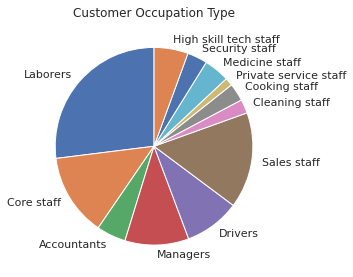

In [22]:
plt.figure(1, figsize=(20,10))
the_grid = GridSpec(2, 2)
plt.subplot(the_grid[0,1], aspect=1, title='Customer Occupation Type')
plt.pie(pie[:12], labels=pie_label[:12], startangle=90)
plt.show()

Boxplot for Payment Difficulties

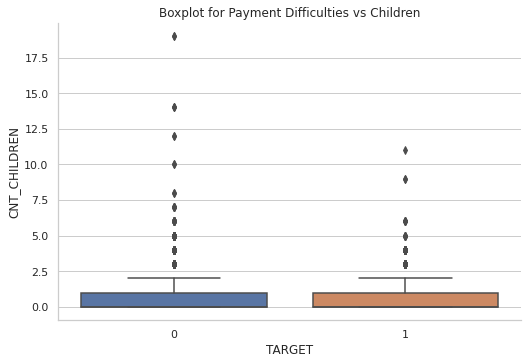

In [35]:
sns.catplot(x='TARGET', y='CNT_CHILDREN', data=data, kind='box', aspect=1.5)
plt.title('Boxplot for Payment Difficulties vs Children')
plt.show()

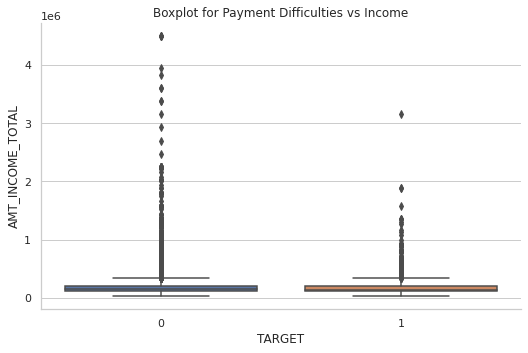

In [68]:
temp_data = data[data['AMT_INCOME_TOTAL'] <= 5000000]
sns.catplot(x='TARGET', y='AMT_INCOME_TOTAL', data=temp_data, kind='box', aspect=1.5)
plt.title('Boxplot for Payment Difficulties vs Income')
plt.show()

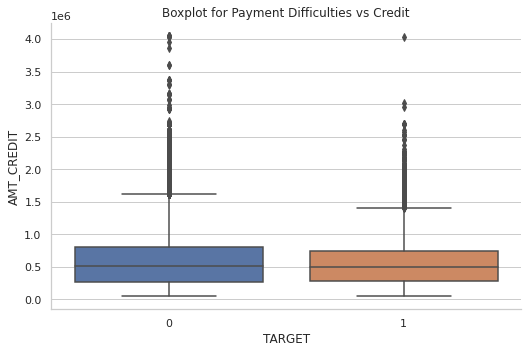

In [67]:
temp_data = data[data['AMT_CREDIT'] <= 2750000]
sns.catplot(x='TARGET', y='AMT_CREDIT', data=data, kind='box', aspect=1.5)
plt.title('Boxplot for Payment Difficulties vs Credit')
plt.show()

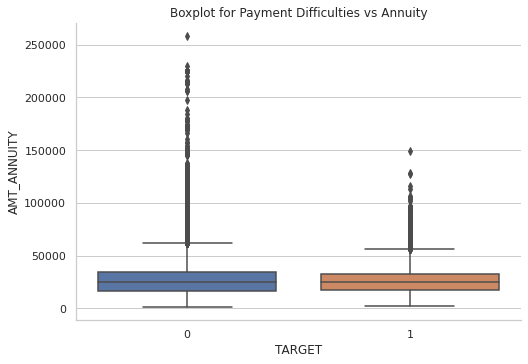

In [52]:
sns.catplot(x='TARGET', y='AMT_ANNUITY', data=data, kind='box', aspect=1.5)
plt.title('Boxplot for Payment Difficulties vs Annuity')
plt.show()

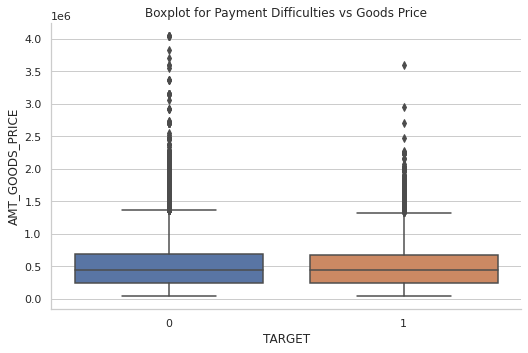

In [53]:
sns.catplot(x='TARGET', y='AMT_GOODS_PRICE', data=data, kind='box', aspect=1.5)
plt.title('Boxplot for Payment Difficulties vs Goods Price')
plt.show()